In [2]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 73.6 MB 927 kB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 22.4 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
# 입력 (x) 과 정답 (y)
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

In [13]:
type(x)

torch.Tensor

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1 → 출력 1
    # forward() 전·후, backward(역전파) 전·후에 특정 동작을 실행할 수 있도록
    # 사용자가 “훅(hook)”을 걸어둘 수 있습니다.
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [6]:
criterion = nn.MSELoss()                # 손실 함수 (Mean Squared Error)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 경사하강법

In [7]:
for epoch in range(500):
    # 1. 순전파 (Forward)
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # 2. 역전파 (Backward)
    optimizer.zero_grad()   # 기울기 초기화
    loss.backward()         # 기울기 계산
    optimizer.step()        # 파라미터 업데이트

    # 3. 50회마다 출력
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/500], Loss: {loss.item():.4f}")

Epoch [50/500], Loss: 0.1510
Epoch [100/500], Loss: 0.1119
Epoch [150/500], Loss: 0.0829
Epoch [200/500], Loss: 0.0614
Epoch [250/500], Loss: 0.0455
Epoch [300/500], Loss: 0.0337
Epoch [350/500], Loss: 0.0250
Epoch [400/500], Loss: 0.0185
Epoch [450/500], Loss: 0.0137
Epoch [500/500], Loss: 0.0102


In [8]:
# 예측
predicted = model(x).detach()
print("\n예측 결과:")
for i in range(len(x)):
    print(f"x={x[i].item():.1f}, 예측 y={predicted[i].item():.2f}")


예측 결과:
x=1.0, 예측 y=2.84
x=2.0, 예측 y=4.92
x=3.0, 예측 y=7.01
x=4.0, 예측 y=9.09


In [ ]:
# ============================================================
# 🔹 PyTorch 기반 선형 회귀 (California Housing Dataset)
# ============================================================

# 1️⃣ 필수 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# ------------------------------------------------------------
# 2️⃣ 데이터 로드 (Scikit-learn 내장 실제 회귀 데이터)
# ------------------------------------------------------------
#   - 입력(feature): 8개 (평균방수, 소득, 인구, 등등)
#   - 타깃(target): 중위 주택가격 (median house value)
# ------------------------------------------------------------
data = fetch_california_housing()

X = data.data       # 입력 데이터 (2D array: [샘플 수, 피처 수])
y = data.target     # 출력값 (1D array: 주택가격)

print(f"입력 데이터 크기: {X.shape}, 타깃 크기: {y.shape}")

# ------------------------------------------------------------
# 3️⃣ 학습용/테스트용 데이터 분할
# ------------------------------------------------------------
#   - train_test_split을 이용하여 80% 학습, 20% 테스트로 나눔
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 4️⃣ 데이터 스케일링 (StandardScaler)
# ------------------------------------------------------------
#   - 각 피처의 평균=0, 표준편차=1 로 맞춰서 학습 안정화
#   - 신경망 학습 시, 입력 데이터가 정규화되어야 수렴이 잘 됨
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------
# 5️⃣ NumPy → PyTorch Tensor 변환
# ------------------------------------------------------------
#   - 신경망은 torch.Tensor 타입을 입력으로 받음
#   - y는 (N, 1) 형태로 reshape 해야 함
# ------------------------------------------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

print(f"Tensor 형태로 변환 완료: {X_train_tensor.shape}, {y_train_tensor.shape}")

# ------------------------------------------------------------
# 6️⃣ 모델 정의 (nn.Module 클래스 상속)
# ------------------------------------------------------------
#   - 입력 피처(8개) → 출력(1개) 단순 선형 회귀
#   - forward() 함수에서 순전파(Forward Propagation) 계산 정의
# ------------------------------------------------------------
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        # Linear Layer 정의: y = Wx + b
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        # 순전파 연산 정의 (여기서는 단순 선형변환)
        return self.linear(x)

# 모델 객체 생성
model = RegressionModel(X_train.shape[1])
print("\n모델 구조:\n", model)

# ------------------------------------------------------------
# 7️⃣ 손실 함수 & 옵티마이저 정의
# ------------------------------------------------------------
#   - 손실 함수: MSELoss (평균제곱오차)
#   - 옵티마이저: Adam (적응적 학습률 기반 경사하강법)
# ------------------------------------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ------------------------------------------------------------
# 8️⃣ 학습 루프 (Training Loop)
# ------------------------------------------------------------
#   - 순전파(Forward) → 손실 계산 → 역전파(Backward) → 가중치 업데이트
#   - 총 300 epoch 동안 반복 학습
# ------------------------------------------------------------
epochs = 300
for epoch in range(epochs):
    # ① 모델 순전파 (예측값 계산)
    y_pred = model(X_train_tensor)

    # ② 손실(loss) 계산
    loss = criterion(y_pred, y_train_tensor)

    # ③ 기울기 초기화 (이전 epoch의 gradient 누적 방지)
    optimizer.zero_grad()

    # ④ 역전파 (오차를 통해 각 파라미터의 gradient 계산)
    loss.backward()

    # ⑤ 가중치 업데이트 (optimizer 규칙에 따라)
    optimizer.step()

    # ⑥ 50epoch마다 손실 출력
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f}")

# ------------------------------------------------------------
# 9️⃣ 평가 모드로 전환 (Evaluation Mode)
# ------------------------------------------------------------
#   - 학습 중 dropout, batchnorm 등을 끔 (현재 모델에는 없음)
#   - with torch.no_grad() : 평가 시 gradient 계산 비활성화 (속도↑, 메모리↓)
# ------------------------------------------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor).item()

# ------------------------------------------------------------
# 🔟 성능 평가 (MSE & RMSE)
# ------------------------------------------------------------
rmse = np.sqrt(test_loss)
print(f"\n테스트 MSE: {test_loss:.4f}")
print(f"테스트 RMSE: {rmse:.4f}")

# ------------------------------------------------------------
# ⓫ 예측 결과 일부 출력
# ------------------------------------------------------------
print("\n실제값 vs 예측값 (상위 5개):")
for i in range(5):
    print(f"실제: {y_test[i]:.3f} | 예측: {y_pred[i].item():.3f}")

입력 데이터 크기: (20640, 8), 타깃 크기: (20640,)
Tensor 형태로 변환 완료: torch.Size([16512, 8]), torch.Size([16512, 1])

모델 구조:
 RegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [50/300] | Loss: 2.9360
Epoch [100/300] | Loss: 1.7756
Epoch [150/300] | Loss: 1.1172
Epoch [200/300] | Loss: 0.7761
Epoch [250/300] | Loss: 0.6174
Epoch [300/300] | Loss: 0.5521

테스트 MSE: 0.5894
테스트 RMSE: 0.7677

실제값 vs 예측값 (상위 5개):
실제: 0.477 | 예측: 0.536
실제: 0.458 | 예측: 1.585
실제: 5.000 | 예측: 2.519
실제: 2.186 | 예측: 2.658
실제: 2.780 | 예측: 2.433


=== 은닉층 노드 수에 따른 정확도 (n_runs = 5) ===
hidden= 4 → Acc: 96.32% ± 3.00%  (runs: [ 97.37  97.37 100.    94.74  92.11])
hidden= 8 → Acc: 96.84% ± 2.88%  (runs: [ 97.37  97.37 100.    97.37  92.11])
hidden=16 → Acc: 95.79% ± 2.35%  (runs: [94.74 97.37 97.37 97.37 92.11])
hidden=32 → Acc: 95.79% ± 3.00%  (runs: [ 94.74  97.37 100.    94.74  92.11])


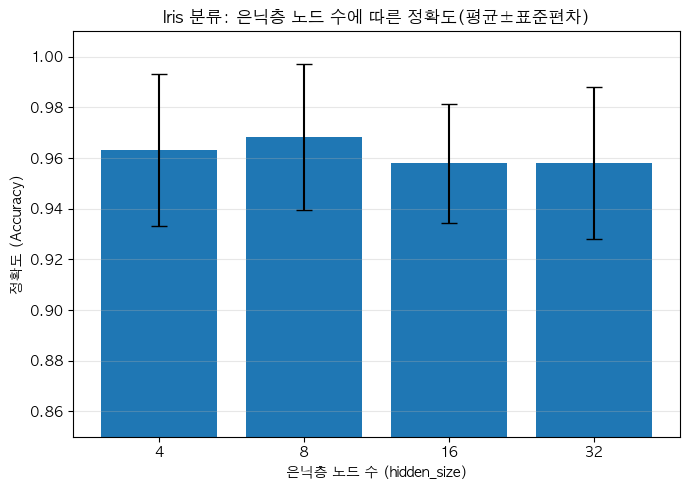

In [15]:
# ============================================================
# 🔹 Iris 분류: 은닉층 노드 수(4, 8, 16, 32)에 따른 정확도 비교
#     - PyTorch MLP(다중 퍼셉트론)
#     - 데이터: sklearn.load_iris()
#     - 전처리: StandardScaler
#     - 학습: CrossEntropyLoss + Adam
#     - 평가: Accuracy (평균 ± 표준편차, n_runs=5)
#     - 시각화: 은닉 노드 수 vs 정확도(오차막대 포함)
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

# (선택) Windows 한글 폰트 문제 방지
# import platform
# if platform.system() == 'Windows':
#     plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ------------------------------------------------------------
# 1) 재현성(Seed) 고정 함수
#    - 반복 실험에서 난수 영향을 줄이기 위해 사용
# ------------------------------------------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    # (GPU 사용 시) 아래 라인도 고려
    # torch.cuda.manual_seed_all(seed)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False

# ------------------------------------------------------------
# 2) 데이터 로드 및 학습/테스트 분할 + 스케일링
#    - Iris: 입력 4개, 클래스 3개
# ------------------------------------------------------------
def prepare_data(test_size=0.25, seed=42):
    iris = load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)

    X_train_t = torch.tensor(X_train, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.long)  # CrossEntropyLoss는 long 필요
    X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
    y_test_t  = torch.tensor(y_test,  dtype=torch.long)
    return X_train_t, X_test_t, y_train_t, y_test_t

# ------------------------------------------------------------
# 3) MLP 모델 정의
#    - 입력 4 → 은닉(hidden_size) → ReLU → 출력 3
#    - 은닉 노드 수를 바꿔가며 성능 비교
# ------------------------------------------------------------
class IrisMLP(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 3)
        )
    def forward(self, x):
        return self.net(x)

# ------------------------------------------------------------
# 4) 학습 루프
#    - 전체 배치 학습(iris는 작아서 배치 분할 불필요)
#    - 반환: 최종 테스트 정확도, (옵션) 학습 손실 기록
# ------------------------------------------------------------
def train_once(hidden_size=8, epochs=200, lr=0.01, seed=42):
    set_seed(seed)
    X_train, X_test, y_train, y_test = prepare_data(seed=seed)
    model = IrisMLP(hidden_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for ep in range(epochs):
        model.train()
        logits = model(X_train)
        loss = criterion(logits, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 평가
    model.eval()
    with torch.no_grad():
        test_logits = model(X_test)
        pred = torch.argmax(test_logits, dim=1)
        acc = accuracy_score(y_test.numpy(), pred.numpy())
    return acc

# ------------------------------------------------------------
# 5) 여러 번 반복하여 평균/표준편차 계산
#    - 각 hidden_size별로 n_runs번 seed를 바꿔가며 측정
# ------------------------------------------------------------
hidden_sizes = [4, 8, 16, 32]
n_runs = 5
epochs = 200
lr = 0.01

results_mean = []
results_std  = []
all_runs = {}

for h in hidden_sizes:
    scores = []
    for run in range(n_runs):
        # seed를 run에 따라 달리 주어 난수 영향 평균화
        acc = train_once(hidden_size=h, epochs=epochs, lr=lr, seed=42 + run)
        scores.append(acc)
    all_runs[h] = scores
    results_mean.append(np.mean(scores))
    results_std.append(np.std(scores, ddof=1))

# ------------------------------------------------------------
# 6) 결과 출력
# ------------------------------------------------------------
print("=== 은닉층 노드 수에 따른 정확도 (n_runs = {}) ===".format(n_runs))
for h, mean, std in zip(hidden_sizes, results_mean, results_std):
    print(f"hidden={h:>2} → Acc: {mean*100:5.2f}% ± {std*100:4.2f}%  (runs: {np.round(np.array(all_runs[h])*100,2)})")

# ------------------------------------------------------------
# 7) 시각화: 은닉 노드 수 vs 정확도(오차막대)
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
x = np.arange(len(hidden_sizes))
plt.bar(x, results_mean, yerr=results_std, capsize=6)
plt.xticks(x, hidden_sizes)
plt.ylim(0.85, 1.01)  # Iris는 성능이 높아 y축 범위를 상향
plt.title("Iris 분류: 은닉층 노드 수에 따른 정확도(평균±표준편차)")
plt.xlabel("은닉층 노드 수 (hidden_size)")
plt.ylabel("정확도 (Accuracy)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# ✅ 해석 가이드
# - hidden_size를 늘리면 표현력이 증가하여 정확도가 상승하는 경향이 있으나,
#   데이터가 단순/작은 경우 너무 큰 모델은 과적합 위험이 있고 이득이 제한적일 수 있음.
# - 본 스크립트는 n_runs 반복 평균으로 seed 의존성을 줄여 공정 비교를 유도.
# ------------------------------------------------------------

In [16]:
# ============================================================
# 🔹 PyTorch 기반 기본 분류 모델 (Iris Classification)
# ============================================================

# 1️⃣ 필수 라이브러리
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ------------------------------------------------------------
# 2️⃣ 데이터 로드 (Iris Dataset)
# ------------------------------------------------------------
#   - 입력: 4개 피처 (꽃받침 길이/너비, 꽃잎 길이/너비)
#   - 출력: 3개 클래스 (setosa, versicolor, virginica)
# ------------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# ------------------------------------------------------------
# 3️⃣ 데이터 분할 (Train/Test)
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 4️⃣ 입력 데이터 스케일링
# ------------------------------------------------------------
#   - 신경망 학습의 안정화를 위해 표준화 수행
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------
# 5️⃣ Tensor 변환
# ------------------------------------------------------------
#   - X: float32, y: long (CrossEntropyLoss는 long형 필요)
# ------------------------------------------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ------------------------------------------------------------
# 6️⃣ 모델 정의 (다층 퍼셉트론 구조)
# ------------------------------------------------------------
#   - 입력층: 4
#   - 은닉층: 8 (ReLU)
#   - 출력층: 3 (Softmax 사용 → CrossEntropyLoss 내부에 포함)
# ------------------------------------------------------------
class IrisClassifier(nn.Module):
    def __init__(self):
        super(IrisClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 8),   # 입력 4 → 은닉 8
            nn.ReLU(),
            nn.Linear(8, 3)    # 은닉 8 → 출력 3 (클래스 수)
        )

    def forward(self, x):
        return self.model(x)

model = IrisClassifier()
print(model)

# ------------------------------------------------------------
# 7️⃣ 손실 함수 & 옵티마이저 정의
# ------------------------------------------------------------
#   - 손실 함수: CrossEntropyLoss (Softmax + NLL 결합)
#   - 옵티마이저: Adam (학습률 0.01)
# ------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ------------------------------------------------------------
# 8️⃣ 학습 루프
# ------------------------------------------------------------
epochs = 200
for epoch in range(epochs):
    # ① 순전파 (Forward)
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # ② 역전파 (Backward)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ③ 로그 출력
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f}")

# ------------------------------------------------------------
# 9️⃣ 평가 단계
# ------------------------------------------------------------
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)       # 테스트 데이터 예측 (logits)
    _, predicted = torch.max(outputs, 1) # 가장 높은 확률의 클래스 선택
    acc = accuracy_score(y_test, predicted.numpy())

print(f"\n테스트 정확도: {acc*100:.2f}%")

# ------------------------------------------------------------
# 🔟 결과 예시 출력
# ------------------------------------------------------------
for i in range(5):
    print(f"실제: {y_test[i]} | 예측: {predicted[i].item()}")

IrisClassifier(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=3, bias=True)
  )
)
Epoch [20/200] | Loss: 0.8313
Epoch [40/200] | Loss: 0.6580
Epoch [60/200] | Loss: 0.4501
Epoch [80/200] | Loss: 0.2323
Epoch [100/200] | Loss: 0.1323
Epoch [120/200] | Loss: 0.0943
Epoch [140/200] | Loss: 0.0777
Epoch [160/200] | Loss: 0.0687
Epoch [180/200] | Loss: 0.0631
Epoch [200/200] | Loss: 0.0594

테스트 정확도: 100.00%
실제: 1 | 예측: 1
실제: 0 | 예측: 0
실제: 2 | 예측: 2
실제: 1 | 예측: 1
실제: 1 | 예측: 1


In [17]:
import pandas as pd 

Epoch [10/100], Loss: 0.008888
Epoch [20/100], Loss: 0.004621
Epoch [30/100], Loss: 0.000953
Epoch [40/100], Loss: 0.000340
Epoch [50/100], Loss: 0.000169
Epoch [60/100], Loss: 0.000114
Epoch [70/100], Loss: 0.000060
Epoch [80/100], Loss: 0.000045
Epoch [90/100], Loss: 0.000031
Epoch [100/100], Loss: 0.000026


C:\Users\ekfla\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ekfla\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


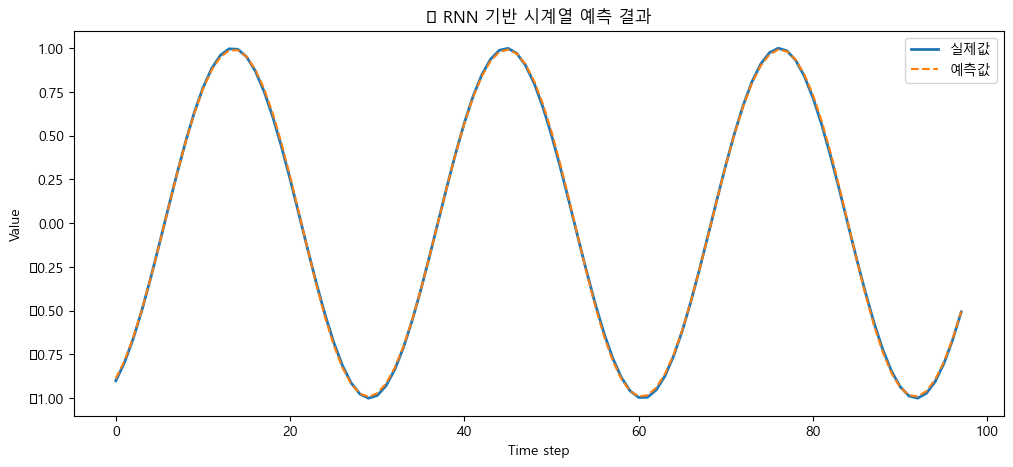

In [2]:
# ============================
# 🧠 RNN 기반 시계열 예측 실습
# ============================

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import platform
if platform.system() == 'Darwin':
    # MAC 사용자인 경우
    plt.rc('font', family='ApppleGothic')
else:
    # windows 사용자인 경우
    plt.rc('font', family='Malgun Gothic')
# -----------------------------
# 1️⃣ 데이터 생성 및 전처리
# -----------------------------

# 예시 데이터: 사인파 기반 시계열
# - 0부터 100까지 균등한 구간 생성
# - 사인함수 값으로 시계열 데이터를 만듦
x = np.linspace(0, 100, 500)
y = np.sin(x)

# 시계열 데이터는 값의 범위가 다르기 때문에,
# 신경망 학습 안정성을 위해 0~1 범위로 정규화 수행
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# 데이터를 (입력 시퀀스, 타깃 값)으로 변환하는 함수
# 예: look_back=10 → 앞의 10개 데이터를 입력으로 사용하여 다음 값을 예측
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(y_scaled, look_back)

# 학습/검증 데이터 분할 (80% : 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# 텐서 형태로 변환 (PyTorch 입력 형식)
# RNN 입력은 (배치, 시퀀스 길이, 특성 수) 형식이어야 함
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

# -----------------------------
# 2️⃣ RNN 모델 정의
# -----------------------------
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1, num_layers=1):
        super(RNNModel, self).__init__()
        # nn.RNN: 기본 순환 신경망
        # - input_size: 입력 특징 수
        # - hidden_size: 은닉 상태 크기 (모델 용량)
        # - num_layers: RNN 계층 수 (깊이)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # 완전연결층 (RNN 출력을 실제 예측값으로 변환)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN의 초기 은닉 상태 초기화
        h0 = torch.zeros(1, x.size(0), 32)
        # RNN 순전파: 입력 → 은닉 상태 → 출력 시퀀스
        out, _ = self.rnn(x, h0)
        # 마지막 시점의 출력을 선택하여 완전연결층에 통과
        out = self.fc(out[:, -1, :])
        return out

# 모델 초기화
model = RNNModel()

# -----------------------------
# 3️⃣ 손실함수 및 옵티마이저 설정
# -----------------------------
criterion = nn.MSELoss()  # 평균제곱오차 (회귀에 적합)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# -----------------------------
# 4️⃣ 학습 루프
# -----------------------------
epochs = 100
for epoch in range(epochs):
    # 순전파
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    # 역전파 및 가중치 업데이트
    optimizer.zero_grad()  # 기존 기울기 초기화
    loss.backward()        # 새로운 기울기 계산
    optimizer.step()       # 파라미터 업데이트

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# -----------------------------
# 5️⃣ 예측 및 결과 시각화
# -----------------------------
model.eval()  # 평가 모드로 전환 (dropout, batchnorm 비활성화)
predicted = model(X_test).detach().numpy()

# 정규화 복원
predicted_rescaled = scaler.inverse_transform(predicted)
Y_test_rescaled = scaler.inverse_transform(Y_test.numpy())

# 예측 결과 시각화
plt.figure(figsize=(12, 5))
plt.plot(Y_test_rescaled, label='실제값', linewidth=2)
plt.plot(predicted_rescaled, label='예측값', linestyle='--')
plt.title("🔮 RNN 기반 시계열 예측 결과")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.legend()
plt.show()


In [3]:
# ==========================================================
# 🔮 PyTorch 단변량 시계열 다단계 예측 템플릿 (주석 자세히)
#    - 입력: 과거 seq_len 길이의 단변량 시계열 (예: 72 스텝)
#    - 출력: horizon 스텝 다단계 예측 (예: 24 스텝)
#    - 모델: LSTM (GRU로 쉽게 교체 가능)
# ==========================================================

import random, numpy as np, torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# -----------------------------
# 0) 재현성(Seed) 및 장치 설정
# -----------------------------
def seed_everything(seed=42):
    """실험 재현성을 높이기 위한 시드 고정 (완전 결정적은 아님)"""
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    # 아래 설정은 연산을 결정적으로 만들어주지만, 속도는 감소할 수 있음
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

device = ('cuda' if torch.cuda.is_available()
          else 'mps' if getattr(torch.backends, "mps", None) and torch.backends.mps.is_available()
          else 'cpu')
print("Device:", device)

# -----------------------------------------
# 1) 샘플 데이터 준비 (합성: 추세 + 계절성 + 잡음)
#    - 실데이터를 쓰는 경우, 이 블록을 CSV 로딩/정규화로 교체하세요.
# -----------------------------------------
T = 5000                       # 전체 길이
t = np.arange(T)
# 주기 50의 사인 + 완만한 양의 추세 + 가우시안 잡음
series = (np.sin(2*np.pi*t/50) + 0.005*t + 0.5*np.random.randn(T)).astype(np.float32)

# -----------------------------
# 2) 시간 순서 분할 (Train/Val/Test)
# -----------------------------
train_ratio, val_ratio = 0.7, 0.15
n_train = int(T * train_ratio)
n_val   = int(T * val_ratio)
train_series = series[:n_train]
val_series   = series[n_train:n_train+n_val]
test_series  = series[n_train+n_val:]

# -----------------------------
# 3) 스케일링(Z-score) - Train 통계 기준
#    - 역정규화를 위해 mean/std 저장
# -----------------------------
mu, sigma = train_series.mean(), train_series.std() + 1e-8
def z(x):  return (x - mu) / sigma
def inv(x): return x * sigma + mu

train_n = z(train_series)
val_n   = z(val_series)
test_n  = z(test_series)

# -----------------------------------------
# 4) 윈도우 생성 함수
#    - seq_len: 입력 길이 (예: 72)
#    - horizon: 출력 길이 (예: 24)
#    - step: 슬라이딩 간격(1이면 매 시점 생성)
#    - 반환:
#      X: [N, seq_len, 1], y: [N, horizon]
# -----------------------------------------
def make_windows(series_1d: np.ndarray, seq_len=72, horizon=24, step=1):
    X, y = [], []
    end = len(series_1d) - seq_len - horizon
    for s in range(0, end + 1, step):
        X.append(series_1d[s:s+seq_len])
        y.append(series_1d[s+seq_len:s+seq_len+horizon])
    X = np.array(X, dtype=np.float32)[..., None]  # feature=1 추가
    y = np.array(y, dtype=np.float32)
    return X, y

# 템플릿 기본 파라미터
seq_len = 72
horizon = 24

train_X, train_y = make_windows(train_n, seq_len, horizon, step=1)
val_X,   val_y   = make_windows(val_n,   seq_len, horizon, step=1)
test_X,  test_y  = make_windows(test_n,  seq_len, horizon, step=1)

print(f"Train: X{train_X.shape}, y{train_y.shape}")
print(f"Val  : X{val_X.shape}, y{val_y.shape}")
print(f"Test : X{test_X.shape}, y{test_y.shape}")

# -----------------------------
# 5) Dataset / DataLoader
# -----------------------------
class TSWindowDataset(Dataset):
    """[N, L, 1] 입력과 [N, H] 타깃을 반환하는 단순 Dataset"""
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)  # float32
        self.y = torch.from_numpy(y)  # float32
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TSWindowDataset(train_X, train_y)
val_ds   = TSWindowDataset(val_X,   val_y)
test_ds  = TSWindowDataset(test_X,  test_y)

# 성능 팁:
# - pin_memory: CUDA 복사 최적화
# - num_workers: 데이터 로딩 병렬(환경에 맞게 0부터 점진적으로)
loader_kwargs = dict(num_workers=0, pin_memory=(device=='cuda'))
train_ld = DataLoader(train_ds, batch_size=128, shuffle=True,  **loader_kwargs)
val_ld   = DataLoader(val_ds,   batch_size=256, shuffle=False, **loader_kwargs)
test_ld  = DataLoader(test_ds,  batch_size=256, shuffle=False, **loader_kwargs)

# -----------------------------
# 6) 모델 정의 (LSTM)
#    - 마지막 시점 hidden → 선형층 → horizon 길이 출력
#    - GRU 사용 시: nn.LSTM → nn.GRU, (hn만 반환)
# -----------------------------
class LSTMForecaster(nn.Module):
    def __init__(self, input_size=1, hidden_size=96, num_layers=2,
                 dropout=0.2, horizon=24):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout if num_layers > 1 else 0.0)
        self.head = nn.Linear(hidden_size, horizon)

    def forward(self, x):
        # x: [B, L, 1]
        out, (hn, cn) = self.lstm(x)  # out: [B, L, H]
        last = out[:, -1, :]          # 마지막 시점 hidden: [B, H]
        yhat = self.head(last)        # [B, horizon]
        return yhat

# (참고) GRU 버전
# class GRUForecaster(nn.Module):
#     def __init__(self, input_size=1, hidden_size=96, num_layers=2,
#                  dropout=0.2, horizon=24):
#         super().__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers,
#                           batch_first=True,
#                           dropout=dropout if num_layers > 1 else 0.0)
#         self.head = nn.Linear(hidden_size, horizon)
#     def forward(self, x):
#         out, hn = self.gru(x)       # out: [B, L, H]
#         last = out[:, -1, :]
#         return self.head(last)

model = LSTMForecaster(input_size=1, hidden_size=96, num_layers=2,
                       dropout=0.2, horizon=horizon).to(device)

# -----------------------------
# 7) 손실/옵티마이저/스케줄러
# -----------------------------
criterion = nn.MSELoss()  # 다단계 회귀 예측 → MSE/MAE가 기본
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# 학습률 스케줄러: 10 에폭마다 lr 0.5배
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# -----------------------------
# 8) 학습/평가 루프
# -----------------------------
def train_one_epoch(model, loader):
    """한 에폭 학습 수행"""
    model.train()
    total = 0.0
    for xb, yb in loader:
        # device 로 이동
        xb, yb = xb.to(device), yb.to(device)
        # grad 초기화 (메모리 최적화를 위해 set_to_none 권장)
        optimizer.zero_grad(set_to_none=True)
        # 순전파
        pred = model(xb)            # [B, horizon]
        loss = criterion(pred, yb)  # 스칼라
        # 역전파
        loss.backward()
        # 기울기 폭주 방지(특히 RNN/Transformer에서 유용)
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # 파라미터 업데이트
        optimizer.step()
        total += loss.item()
    return total / len(loader)

@torch.no_grad()
def evaluate(model, loader):
    """검증/테스트 평가 (no grad)"""
    model.eval()
    total = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        total += criterion(pred, yb).item()
    return total / len(loader)

best_val, best_path = float('inf'), 'best_lstm.pt'
max_epochs = 30
for epoch in range(1, max_epochs + 1):
    tr = train_one_epoch(model, train_ld)
    va = evaluate(model, val_ld)
    scheduler.step()
    print(f"[{epoch:02d}] train={tr:.4f}  val={va:.4f}")
    # Best 모델 저장(검증 손실 기준)
    if va < best_val - 1e-7:
        best_val = va
        torch.save(model.state_dict(), best_path)
        # print(f"  ✅ Best updated → val={best_val:.4f}")

# -----------------------------
# 9) 테스트 평가 + 역정규화 + 간단 지표
# -----------------------------
@torch.no_grad()
def predict_all(model, loader):
    """전체 배치에 대한 예측/정답 스택 (정규화 공간)"""
    model.eval()
    preds, trues = [], []
    for xb, yb in loader:
        xb = xb.to(device)
        pred = model(xb).cpu().numpy()  # [B, H]
        preds.append(pred); trues.append(yb.numpy())
    preds = np.concatenate(preds, axis=0)
    trues = np.concatenate(trues, axis=0)
    return preds, trues

# Best 가중치 로드 후 테스트 예측
model.load_state_dict(torch.load(best_path, map_location=device))
pred_n, true_n = predict_all(model, test_ld)  # 정규화 공간

# 다단계 역정규화: 스텝별로 inverse
def inv_batch(batch_2d):
    # [N, H] → 각 row를 역정규화
    out = []
    for row in batch_2d:
        out.append(inv(row))
    return np.stack(out, axis=0)

pred = inv_batch(pred_n)   # [N, H] (원단위)
true = inv_batch(true_n)   # [N, H]

MAE  = float(np.mean(np.abs(pred - true)))
RMSE = float(np.sqrt(np.mean((pred - true)**2)))
# sMAPE: 대칭 MAPE (0으로 나눔 방지 작은 epsilon 추가)
sMAPE = float(100*np.mean(2*np.abs(pred-true)/(np.abs(pred)+np.abs(true)+1e-8)))
print(f"Test  MAE={MAE:.3f}  RMSE={RMSE:.3f}  sMAPE={sMAPE:.2f}%")

# -----------------------------
# 10) 최근 구간 → 미래 horizon 예측 (데모)
# -----------------------------
# 가장 최근 seq_len 구간에서 horizon 스텝을 한 번에 예측
last_input_n = test_n[-(seq_len + horizon):-horizon]  # 테스트 끝 근처에서 추출
x_demo = torch.from_numpy(last_input_n.reshape(1, seq_len, 1)).to(device)
with torch.no_grad():
    next_h_n = model(x_demo).cpu().numpy()[0]          # [H,]
next_h = inv(next_h_n)

print("예측 샘플(첫 10개):", next_h[:10])


Device: cpu
Train: X(3405, 72, 1), y(3405, 24)
Val  : X(655, 72, 1), y(655, 24)
Test : X(655, 72, 1), y(655, 24)
[01] train=0.5529  val=1.2340
[02] train=0.1165  val=0.5712
[03] train=0.0610  val=0.2145
[04] train=0.0568  val=0.2208
[05] train=0.0547  val=0.2462
[06] train=0.0537  val=0.2285
[07] train=0.0527  val=0.2765
[08] train=0.0500  val=0.3496
[09] train=0.0479  val=0.2956
[10] train=0.0464  val=0.3183
[11] train=0.0432  val=0.3226
[12] train=0.0412  val=0.3413
[13] train=0.0396  val=0.3041
[14] train=0.0393  val=0.3041
[15] train=0.0379  val=0.3095
[16] train=0.0356  val=0.2977
[17] train=0.0373  val=0.2847
[18] train=0.0344  val=0.2761
[19] train=0.0334  val=0.3448
[20] train=0.0307  val=0.3036
[21] train=0.0285  val=0.3473
[22] train=0.0277  val=0.3264
[23] train=0.0258  val=0.3827
[24] train=0.0230  val=0.2826
[25] train=0.0212  val=0.2853
[26] train=0.0200  val=0.2758
[27] train=0.0189  val=0.2618
[28] train=0.0181  val=0.2603
[29] train=0.0179  val=0.2539
[30] train=0.0170